# Midterm: 5000 Movie Dataset
### Dataset: https://www.kaggle.com/tmdb/tmdb-movie-metadata/data 

In [588]:
%matplotlib inline
import csv
import matplotlib.pyplot as plt
from altair import *
import math
import os
import pandas as pd
from collections import Counter
from wordcloud import *
import string
import re
import random
from nltk.corpus import stopwords
from wordcloud import *
import psycopg2
import networkx as nx
from wordcloud import *
import string
import re

In [390]:
movieData = pd.read_csv('tmdb_5000_movies.csv')
movieData

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avenge

## What are the 10 most popular movies in the Animation and Family genre?

In [287]:
animation_family = movieData[movieData['genres'] == '[{"id": 16, "name": "Animation"}, {"id": 10751, "name": "Family"}]']
result = animation_family.sort_values('popularity', ascending=False)

In [288]:
result = action_adventure_fantasy.sort_values(['vote_average'],ascending=False)
result.head(n=10)

,id,title,genres,keywords,popularity,production_countries,budget,revenue,vote_average,vote_count,vote_avg_analysis,country_count
57,10681,WALLÂ·E,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...","[{""id"": 9799, ""name"": ""romantic comedy""}]",66.390712,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",180000000,521311860,7.8,6296,>=5.0,<class 'str'>
328,12,Finding Nemo,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...","[{""id"": 494, ""name"": ""father son relationship""...",85.688789,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",94000000,940335536,7.6,6122,>=5.0,<class 'str'>
1471,12429,å´ã®ä¸ã®ããã§,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...","[{""id"": 456, ""name"": ""mother""}, {""id"": 1357, ""...",39.586760,"[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",41677699,187479518,7.5,926,>=5.0,<class 'str'>
6,38757,Tangled,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...","[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",48.681969,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",260000000,591794936,7.4,3330,>=5.0,<class 'str'>
874,9444,Anastasia,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...","[{""id"": 3462, ""name"": ""tzar""}, {""id"": 4344, ""n...",45.565918,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",53000000,139804348,7.4,1432,>=5.0,<class 'str'>
722,14836,Coraline,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...","[{""id"": 1566, ""name"": ""dream""}, {""id"": 4484, ""...",51.146047,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",60000000,124596398,7.3,1386,>=5.0,<class 'str'>
430,11544,Lilo & Stitch,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...","[{""id"": 1156, ""name"": ""sister sister relations...",55.659988,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",80000000,145771527,7.1,1314,>=5.0,<class 'str'>
614,20352,Despicable Me,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...","[{""id"": 4130, ""name"": ""adoptive father""}, {""id...",113.858273,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",69000000,543513985,7.1,6478,>=5.0,<class 'str'>
34,62211,Monsters University,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...","[{""id"": 1299, ""name"": ""monster""}, {""id"": 5984,...",89.186492,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",200000000,743559607,7.0,3528,>=5.0,<class 'str'>
1108,10895,Pinocchio,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...","[{""id"": 131, ""name"": ""italy""}, {""id"": 2251, ""n...",46.007991,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2600000,84300000,6.9,1355,>=5.0,<class 'str'>


## What country has produced the most movies? Use networkx to visulize this.

#### Formatting the production_countries strings

In [496]:
ctrys = movieData["production_countries"].tolist()
movies = movieData["title"].tolist()

movies_by_ctry = {'country': [], 'movie': []}

movie_place = 0
for i in range(0, len(ctrys)):
    item = ctrys[i]
    new_item = item[1:-1]
    lst = new_item.split(', ')
    for i in range(1, len(lst), 2):
        full_name = lst[i]
        name = full_name[9:-2]
        movies_by_ctry['country'].append(name)
        movies_by_ctry['movie'].append(movies[movie_place])
    movie_place += 1

    
print(len(movies_by_ctry['country']))
print(len(movies_by_ctry['movie']))

6436
6436


In [498]:
ctry_movies = pd.DataFrame(movies_by_ctry, columns = ['country', 'movie'])
ctry_movies.head(n=5)

,country,movie
0,United States of America,Avatar
1,United Kingdom,Avatar
2,United States of America,Pirates of the Caribbean: At World's End
3,United Kingdom,Spectre
4,United States of America,Spectre


#### Grouping by country and counting number of movies produced

In [499]:
count_ctry = ctry_movies.groupby('country').count()
num_movies = count_ctry.sort_values('movie', ascending=False)
num_movies.head()

,movie
country,
United States of America,3956
United Kingdom,636
Germany,324
France,306
Canada,261


#### Graphing countries to movies

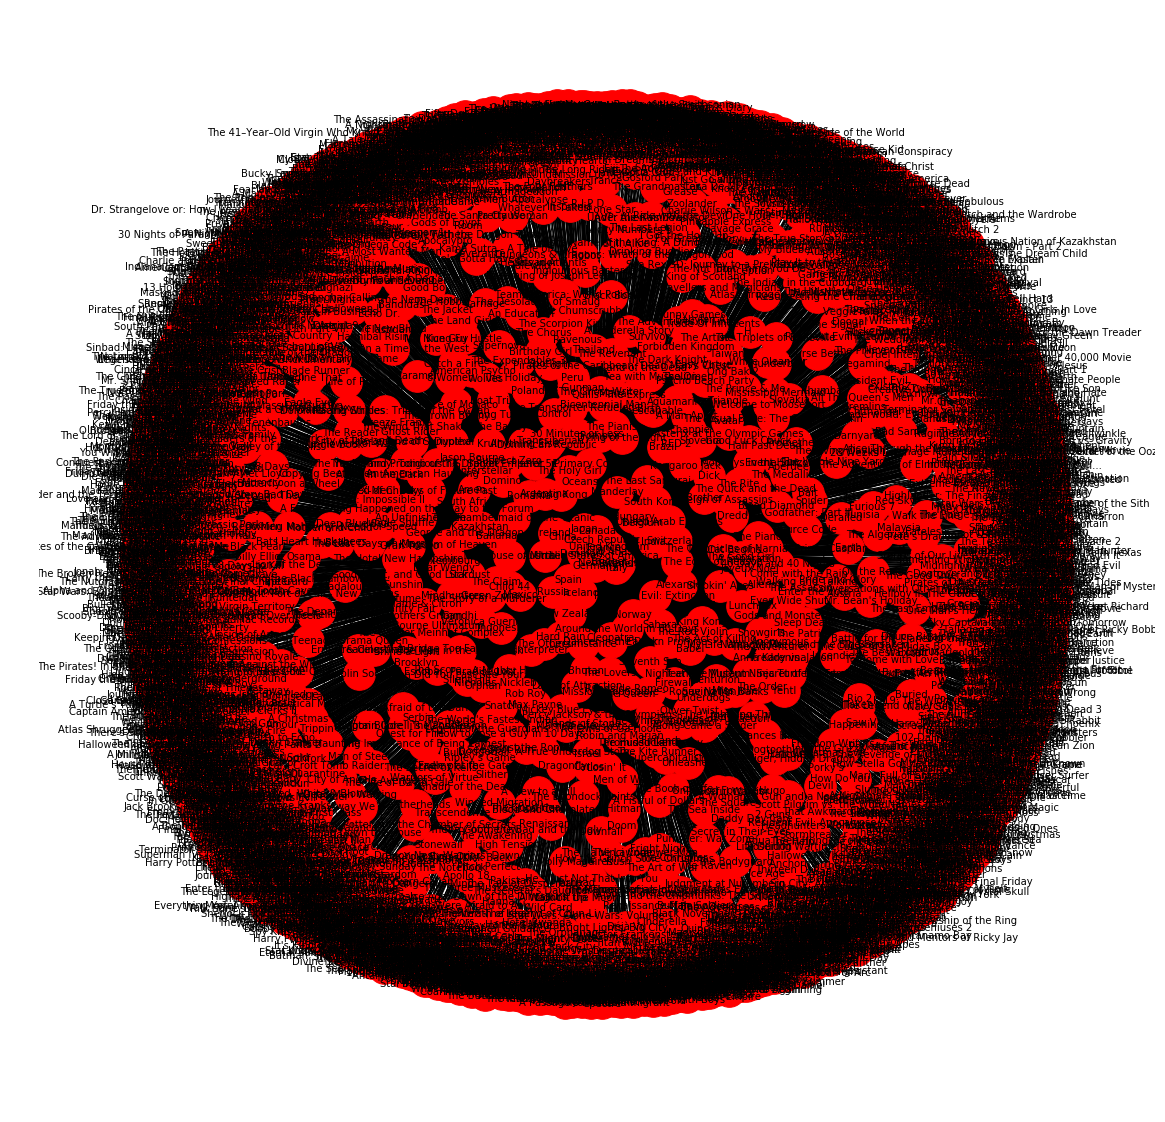

In [500]:
g = nx.Graph()

g.add_nodes_from(ctry_movies.country)

for index, row in ctry_movies.iterrows():
    g.add_edge(row['country'], row['movie'])

gfig,gax = plt.subplots(figsize=(20,20))
pos = nx.spring_layout(g,k=.3,scale=8.0,center=(0,0))
nx.draw(g,pos,ax=gax,node_size=1000,with_labels=True,font_size=10)

plt.show()

#### Scaling it back...

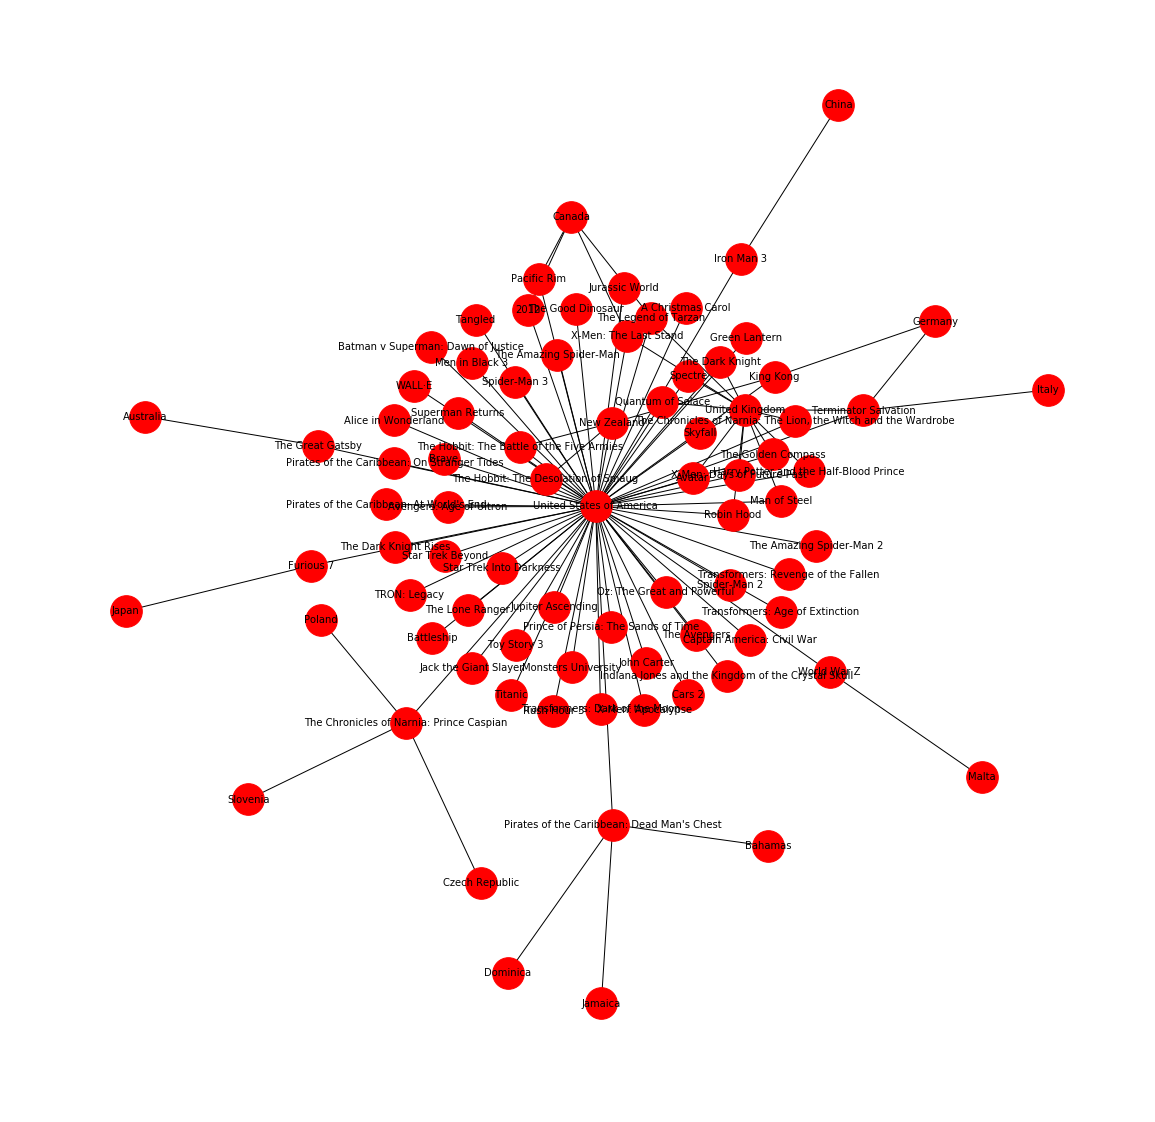

In [501]:
scaling_back = ctry_movies.head(n=100)

g = nx.Graph()

g.add_nodes_from(scaling_back.country)

for index, row in scaling_back.iterrows():
    g.add_edge(row['country'], row['movie'])

gfig,gax = plt.subplots(figsize=(20,20))
pos = nx.spring_layout(g,k=.3,scale=8.0,center=(0,0))
nx.draw(g,pos,ax=gax,node_size=1000,with_labels=True,font_size=10)

plt.show()

### Conclusion: The United States of America has produced the most movies (3956 movies)

## What is the average budget for a movie given it's rating? Do higher budget movies tend to have higher ratings?

In [308]:
rate_budget = movieData.groupby('vote_average')['budget'].mean()
rate_budget

vote_average
0.0     1.294683e+05
0.5     0.000000e+00
1.0     0.000000e+00
1.9     0.000000e+00
2.0     8.333550e+04
2.2     0.000000e+00
2.3     3.250000e+07
2.4     0.000000e+00
2.6     0.000000e+00
2.7     0.000000e+00
2.8     7.500000e+05
2.9     2.340000e+07
3.0     1.094615e+07
3.1     6.375000e+06
3.2     8.714286e+06
3.3     4.730556e+06
3.4     5.500000e+06
3.5     8.670833e+06
3.6     2.686000e+07
3.7     1.711111e+07
3.8     1.110000e+07
3.9     1.716667e+07
4.0     1.561539e+07
4.1     1.895576e+07
4.2     2.189286e+07
4.3     1.686786e+07
4.4     2.269179e+07
4.5     1.381250e+07
4.6     1.489868e+07
4.7     2.161569e+07
            ...     
5.9     3.734413e+07
6.0     2.963056e+07
6.1     3.228502e+07
6.2     3.479462e+07
6.3     3.171359e+07
6.4     3.163433e+07
6.5     3.204780e+07
6.6     3.168518e+07
6.7     3.295340e+07
6.8     2.349888e+07
6.9     2.414301e+07
7.0     2.814617e+07
7.1     3.312212e+07
7.2     2.558549e+07
7.3     3.251311e+07
7.4     2.980027e+07


Text(0.5,0,'Budget')

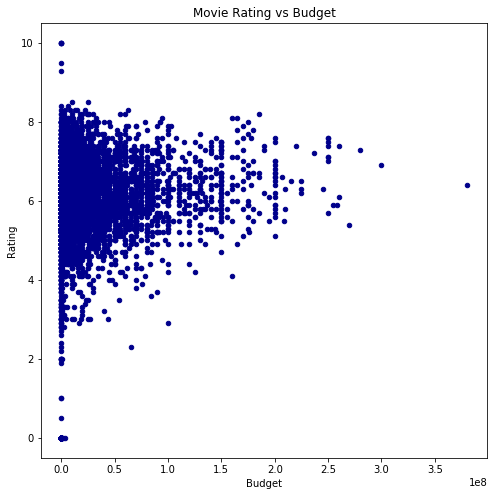

In [451]:
movieData.plot(figsize=(8,8), kind='scatter', x='budget', y='vote_average', color = 'DarkBlue')
plt.title('Movie Rating vs Budget')
plt.ylabel('Rating')
plt.xlabel('Budget')

### Conclusion: There appears to be no correlation between budget and movie rating
#### Follow up: Do revenue and popularity have a better correlation?
----> Conclusion: sort of, but not by much

Text(0.5,0,'Budget')

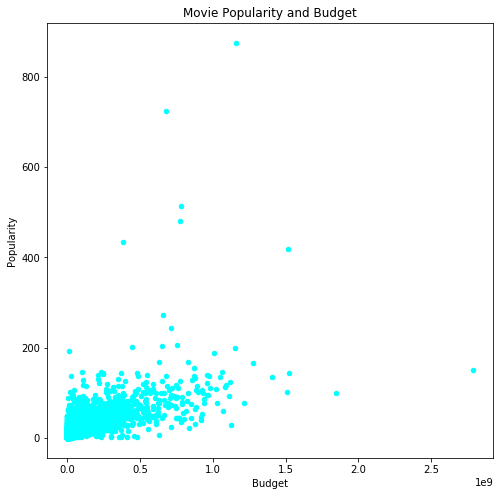

In [458]:
movieData.plot(figsize=(8,8), kind='scatter', x='revenue', y='popularity', color = 'cyan')
plt.title('Movie Popularity and Budget')
plt.ylabel('Popularity')
plt.xlabel('Budget')

## What is the distribution of vote_average (rating) and the count of movies with that rating?

#### Finding the integer of each vote_average number, creating a new column out of it

In [459]:
movieData['int_vote_avg'] = movieData.vote_average.map(lambda x : int(x))
movieData.head(n=1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,int_vote_avg
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,7


#### Creating a dictionary of int_vote_avg and count

In [405]:
rating_count = {}

for vote in movieData.int_vote_avg:
    if vote not in rating_count:
        rating_count[vote] = 1
    else:
        rating_count[vote] += 1

In [404]:
rating_df = pd.DataFrame(columns = ['rating', 'count'])

rating_df['rating'] = rating_count.keys()
rating_df['count'] = rating_count.values()

rating_df

,rating,count
0,0,64
1,1,3
2,2,21
3,3,84
4,4,356
5,5,1303
6,6,1984
7,7,903
8,8,79
9,9,2


#### (checking to make sure the new dataframe is correct using group by)

In [407]:
compare = movieData.groupby('int_vote_avg')['title'].count()
compare

int_vote_avg
0       64
1        3
2       21
3       84
4      356
5     1303
6     1984
7      903
8       79
9        2
10       4
Name: title, dtype: int64

#### Creating a bar graph to better visulize the distribution of int_vote_average 

Text(0.5,0,'Rating')

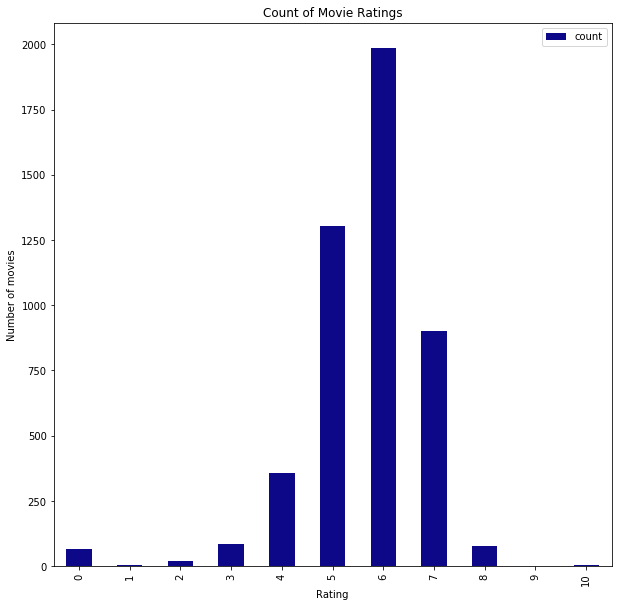

In [425]:
rating_count_bar_chart = rating_df.set_index(['rating'])

rating_count_bar_chart.plot.bar(figsize=(10,10), colormap ='plasma')

plt.title('Count of Movie Ratings')
plt.ylabel('Number of movies')
plt.xlabel('Rating')

### Conclusion: By looking at the bar graph, it looks like a movie rating between 6-7 (not including 7) is the most popular 

## Find the most common genres

In [587]:
count_genres = movieData.groupby('genres').count()
count_genres = count_genres.reset_index()
count_genres = count_genres[count_genres.budget > 50]
count_genres = count_genres.rename(columns = {'budget':'count'})
result = count_genres.sort_values(['count'], ascending=False)
result = result[['genres', 'count']]
result

,genres,count
543,"[{""id"": 18, ""name"": ""Drama""}]",370
944,"[{""id"": 35, ""name"": ""Comedy""}]",282
392,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""name"": ""Romance""}]",164
833,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""name"": ""Romance""}]",144
899,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""name"": ""Drama""}]",142
876,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""name"": ""Romance""}]",109
578,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""name"": ""Thriller""}]",88
1174,"[{""id"": 99, ""name"": ""Documentary""}]",68
590,"[{""id"": 27, ""name"": ""Horror""}]",64
519,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name"": ""Thriller""}]",62


## Key words of the Horror, Thriller genre

In [589]:
sw = set(stopwords.words())

In [601]:
patt = re.compile(r'id|name|:|"')

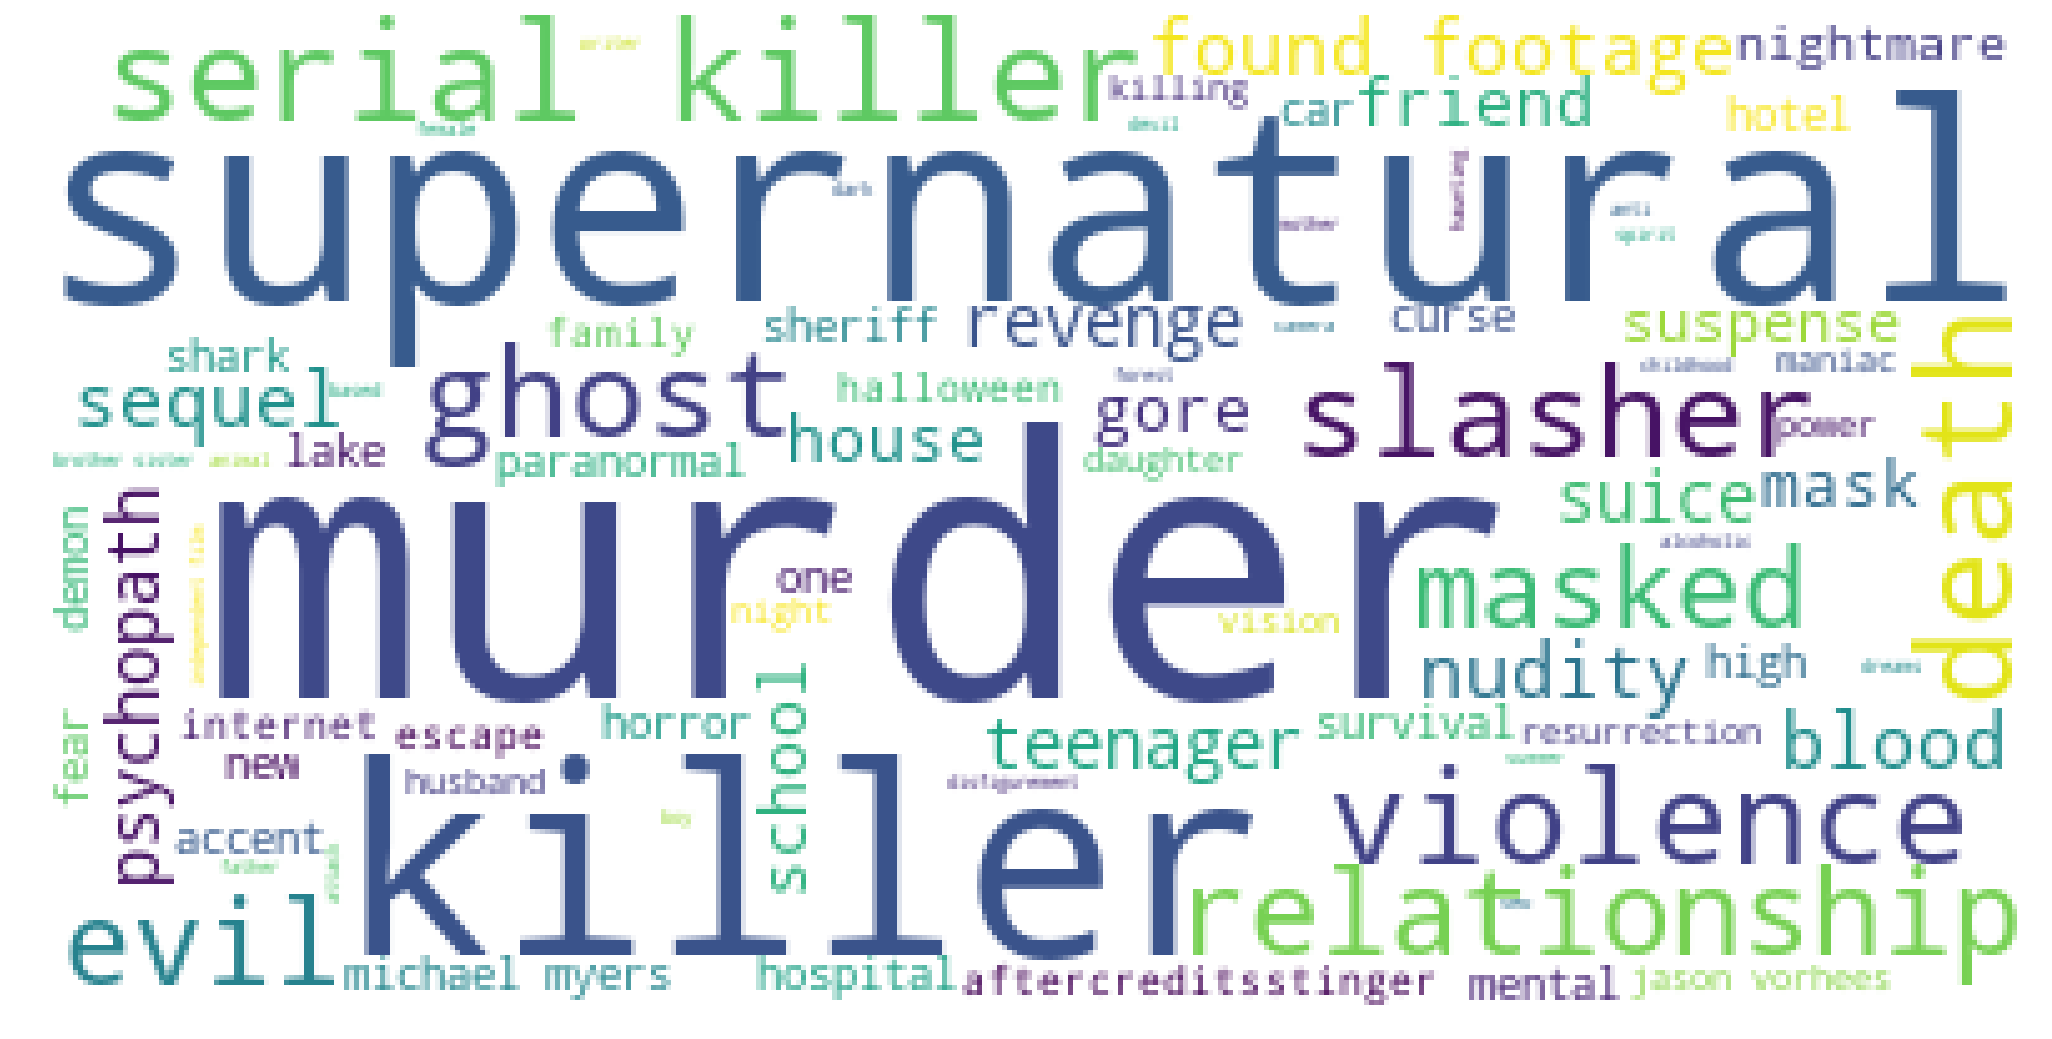

In [602]:
fig, ax = plt.subplots(figsize=(36, 20))
wc = WordCloud(stopwords=sw, background_color='white').generate(re.sub(patt,'', " ".join(movieData[movieData.genres== '[{"id": 27, "name": "Horror"}, {"id": 53, "name": "Thriller"}]'].keywords)))

ax.axis('off')
ax.imshow(wc)

#### just for comparison...the comdey genre

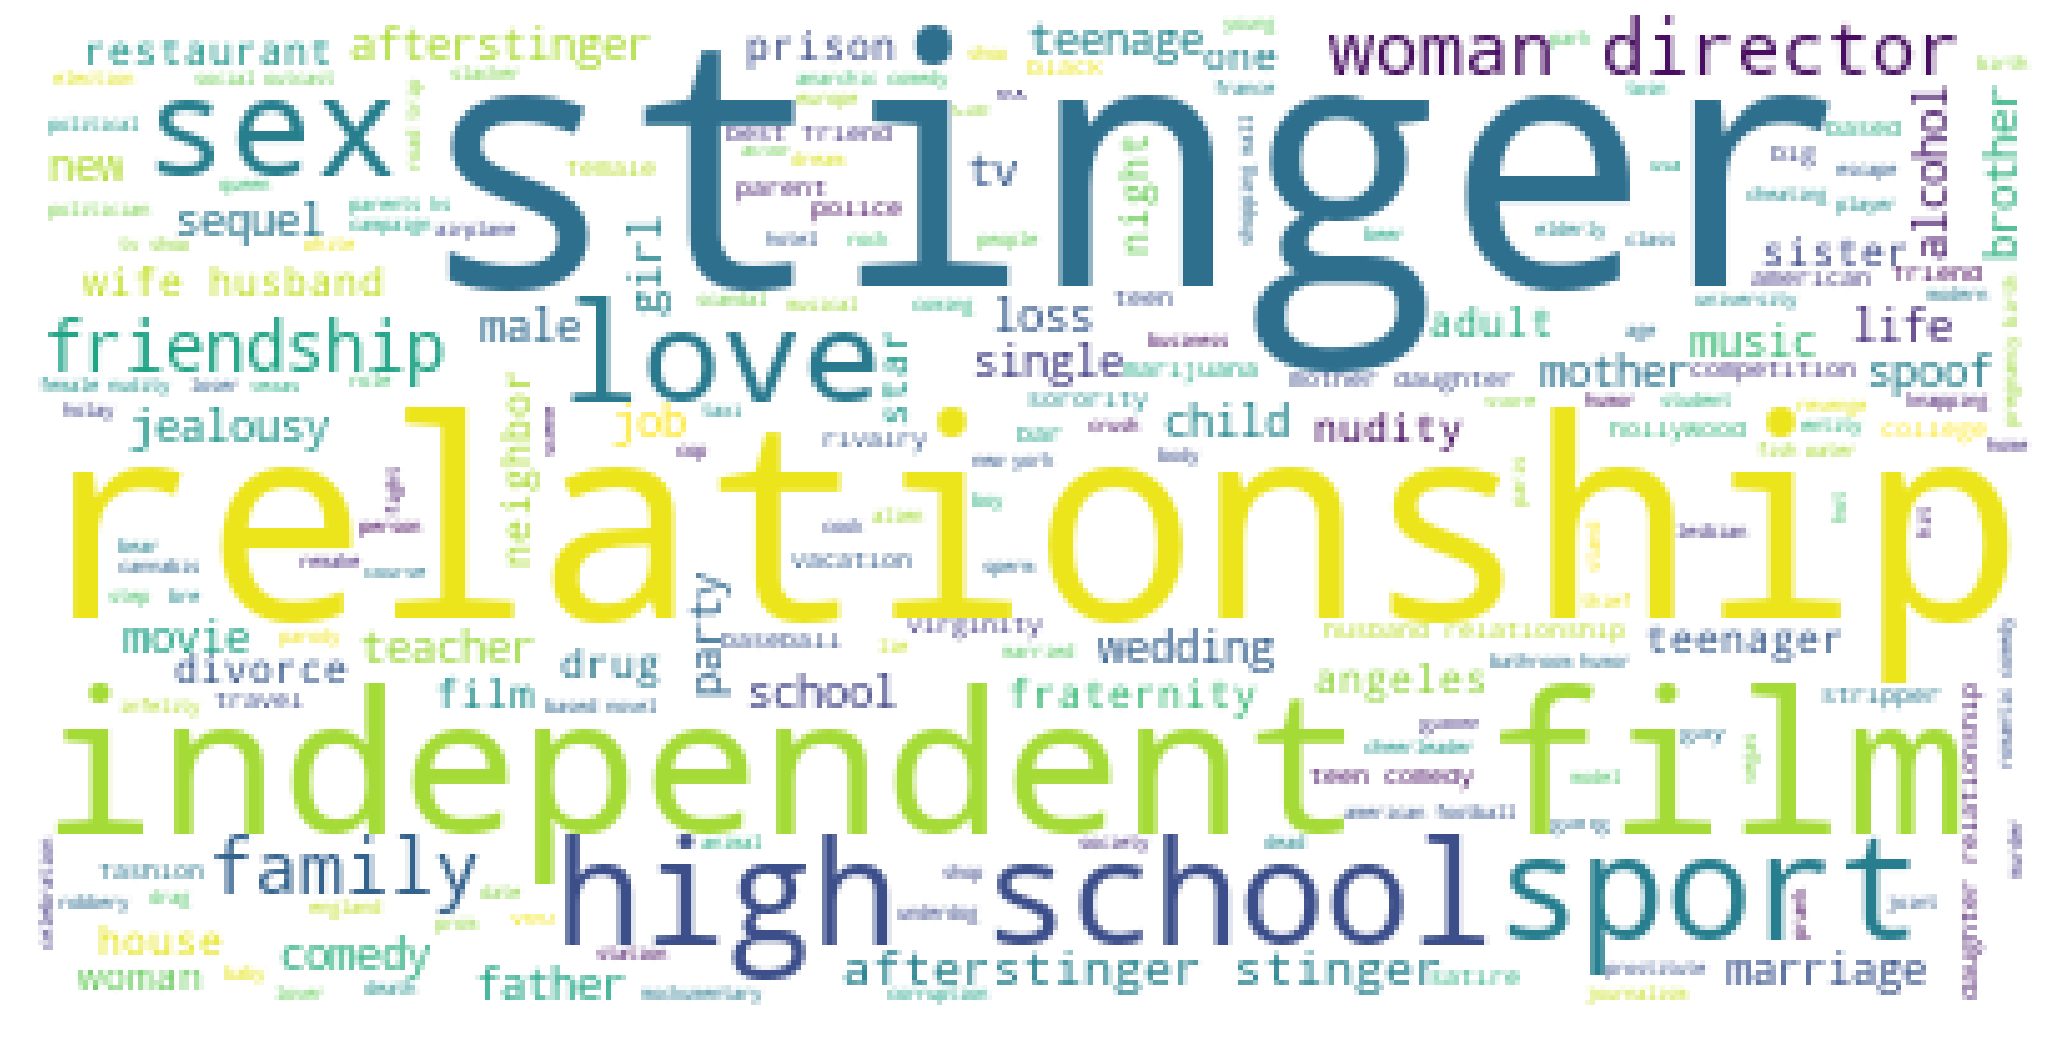

In [608]:
patt = re.compile(r'id|name|:|during|credits')

fig, ax = plt.subplots(figsize=(36, 20))
wc = WordCloud(stopwords=sw, background_color='white').generate(re.sub(patt,'', " ".join(movieData[movieData.genres== '[{"id": 35, "name": "Comedy"}]'].keywords)))

ax.axis('off')
ax.imshow(wc)